In [46]:
import pandas as pd
import numpy as np


In [47]:
train=pd.read_csv(r'C:\Users\malee\Downloads\dataset\dataset\train.csv')
test=pd.read_csv(r'C:\Users\malee\Downloads\dataset\dataset\test.csv')

In [48]:
train.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [49]:
train..shape


(7352, 563)

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
target_names = ['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS']

In [43]:
import sklearn
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [44]:
features = train.iloc[:,0:562]
label = train['Activity']
clf = ExtraTreesClassifier()
clf = clf.fit(features, label)
model = SelectFromModel(clf, prefit=True)
New_features = model.transform(features)
print(New_features.shape)

(7352, 95)


In [45]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(features, label)
model_2 = SelectFromModel(lsvc, prefit=True)
New_features_2 = model_2.transform(features)
print(New_features_2.shape)

(7352, 105)


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
Classifiers = [LogisticRegression(C=10),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=200),GaussianNB(),KNeighborsClassifier(n_neighbors=3),GradientBoostingClassifier(n_estimators=200),SVC(C=1.0)]

In [31]:
#without feature selection
from sklearn.metrics import accuracy_score
import timeit
test_features= test.iloc[:,0:562]
Time_1=[]
Model_1=[]
Out_Accuracy_1=[]
for clf in Classifiers:
    start_time = timeit.default_timer()
    fit=clf.fit(features,label)
    pred=fit.predict(test_features)
    print(clf.__class__.__name__)
    print(classification_report(test['Activity'],pred,target_names=target_names))
    print(confusion_matrix(test['Activity'], pred))
    print("\n")
    elapsed = timeit.default_timer() - start_time
    Time_1.append(elapsed)
    Model_1.append(clf.__class__.__name__)
    Out_Accuracy_1.append(accuracy_score(test['Activity'],pred))

LogisticRegression
                    precision    recall  f1-score   support

          STANDING       1.00      1.00      1.00       537
           SITTING       0.98      0.86      0.92       491
            LAYING       0.89      0.98      0.93       532
           WALKING       0.94      1.00      0.97       496
WALKING_DOWNSTAIRS       1.00      0.97      0.99       420
  WALKING_UPSTAIRS       0.97      0.95      0.96       471

       avg / total       0.96      0.96      0.96      2947

[[537   0   0   0   0   0]
 [  0 424  63   0   0   4]
 [  0  10 521   1   0   0]
 [  0   0   0 495   1   0]
 [  0   0   0   3 409   8]
 [  0   0   0  25   0 446]]


DecisionTreeClassifier
                    precision    recall  f1-score   support

          STANDING       1.00      1.00      1.00       537
           SITTING       0.83      0.76      0.79       491
            LAYING       0.79      0.85      0.82       532
           WALKING       0.83      0.91      0.87       496
WALKING_D

In [37]:
#with l1-based feature selection
test_features= model_2.transform(test.iloc[:,0:562])
Time_3=[]
Model_3=[]
Out_Accuracy_3=[]
for clf in Classifiers:
    start_time = timeit.default_timer()
    fit=clf.fit(New_features_2,label)
    pred=fit.predict(test_features)
    print(clf.__class__.__name__)
    print(classification_report(test['Activity'],pred,target_names=target_names))
    print(confusion_matrix(test['Activity'], pred))
    print("\n")
    elapsed = timeit.default_timer() - start_time
    Time_3.append(elapsed)
    Model_3.append(clf.__class__.__name__)
    Out_Accuracy_3.append(accuracy_score(test['Activity'],pred))

LogisticRegression
                    precision    recall  f1-score   support

          STANDING       1.00      1.00      1.00       537
           SITTING       0.96      0.85      0.90       491
            LAYING       0.88      0.97      0.92       532
           WALKING       0.93      1.00      0.96       496
WALKING_DOWNSTAIRS       0.98      0.99      0.99       420
  WALKING_UPSTAIRS       0.99      0.92      0.95       471

       avg / total       0.96      0.95      0.95      2947

[[537   0   0   0   0   0]
 [  0 419  68   0   0   4]
 [  0  16 515   1   0   0]
 [  0   0   0 494   2   0]
 [  0   0   0   3 415   2]
 [  0   0   0  35   5 431]]


DecisionTreeClassifier
                    precision    recall  f1-score   support

          STANDING       1.00      1.00      1.00       537
           SITTING       0.85      0.78      0.81       491
            LAYING       0.81      0.87      0.84       532
           WALKING       0.80      0.91      0.85       496
WALKING_D

In [33]:
#with tree based feature selection
test_features= model.transform(test.iloc[:,0:562])
Time_2=[]
Model_2=[]
Out_Accuracy_2=[]
for clf in Classifiers:
    start_time = timeit.default_timer()
    fit=clf.fit(New_features,label)
    pred=fit.predict(test_features)
    print(clf.__class__.__name__)
    print(classification_report(test['Activity'],pred,target_names=target_names))
    print(confusion_matrix(test['Activity'], pred))
    print("\n")
    elapsed = timeit.default_timer() - start_time
    Time_2.append(elapsed)
    Model_2.append(clf.__class__.__name__)
    Out_Accuracy_2.append(accuracy_score(test['Activity'],pred))

LogisticRegression
                    precision    recall  f1-score   support

          STANDING       1.00      1.00      1.00       537
           SITTING       0.92      0.83      0.87       491
            LAYING       0.86      0.94      0.90       532
           WALKING       0.92      0.99      0.96       496
WALKING_DOWNSTAIRS       1.00      0.97      0.98       420
  WALKING_UPSTAIRS       0.97      0.91      0.94       471

       avg / total       0.94      0.94      0.94      2947

[[537   0   0   0   0   0]
 [  0 407  82   0   0   2]
 [  0  34 498   0   0   0]
 [  0   0   0 493   1   2]
 [  0   0   0   2 407  11]
 [  0   0   0  40   1 430]]


DecisionTreeClassifier
                    precision    recall  f1-score   support

          STANDING       1.00      1.00      1.00       537
           SITTING       0.84      0.81      0.83       491
            LAYING       0.83      0.86      0.84       532
           WALKING       0.80      0.91      0.85       496
WALKING_D

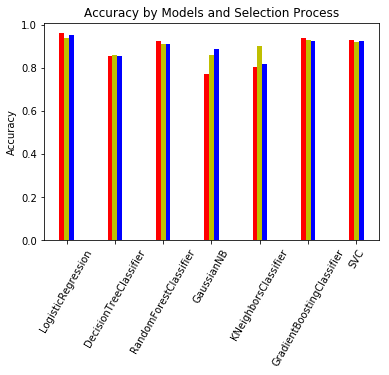

In [34]:
#accuracy
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
ind =  np.arange(7)   # the x locations for the groups
width = 0.1     # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind, Out_Accuracy_1, width, color='r')
rects2 = ax.bar(ind + width, Out_Accuracy_2, width, color='y')
rects3 = ax.bar(ind + width + width ,Out_Accuracy_3, width, color='b')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Models and Selection Process')
ax.set_xticks(ind + width)
ax.set_xticklabels(Model_3,rotation=60)
plt.show()

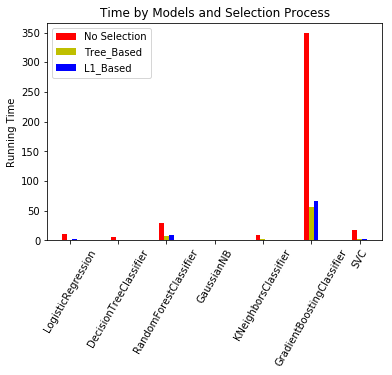

In [35]:
#runtime
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
ind =  np.arange(7)   # the x locations for the groups
width = 0.1       # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind, Time_1, width, color='r')
rects2 = ax.bar(ind + width, Time_2, width, color='y')
rects3 = ax.bar(ind + width + width ,Time_3, width, color='b')
ax.set_ylabel('Running Time')
ax.set_title('Time by Models and Selection Process')
ax.set_xticks(ind + width)
ax.set_xticklabels(Model_3,rotation=60)
ax.legend((rects1[0], rects2[0],rects3[0]), ('No Selection', 'Tree_Based','L1_Based'))
plt.show()